In [2]:
from __future__ import print_function

import numpy as np
from sklearn import datasets, neighbors, linear_model, tree
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import RandomizedPCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

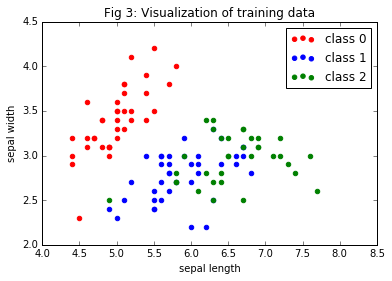

In [3]:
iris = load_iris()
X = iris.data[:,:2] #Choosing only the first two input-features
Y = iris.target

number_of_samples = len(Y)

#Splitting into training and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.75)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Test set
x_test = X[random_indices[num_training_samples:]]
y_test = Y[random_indices[num_training_samples:]]

#Visualizing the training data
X_class0 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==0]) #Picking only the first two classes
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int)
X_class1 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int)
X_class2 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==2])
Y_class2 = np.full((X_class2.shape[0]),fill_value=2,dtype=np.int)

plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='blue')
plt.scatter(X_class2[:,0], X_class2[:,1],color='green')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1','class 2'])
plt.title('Fig 3: Visualization of training data')
plt.show()

In [4]:
model=neighbors.KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [5]:
query_point = np.array([5.9,2.9])
true_class_of_query_point = 1
predicted_class_for_query_point = model.predict([query_point])
print("Query point: {}".format(query_point))
print("True class of query point: {}".format(true_class_of_query_point))

Query point: [ 5.9  2.9]
True class of query point: 1


In [6]:
query_point.shape

(2,)

The query point is: [ 5.9  2.9]

The nearest neighbors of the query point are:
 [[ 6.   2.9]
 [ 5.9  3. ]
 [ 5.9  3. ]
 [ 5.8  2.8]
 [ 6.1  2.9]]

The classes of the nearest neighbors are: [1 2 1 2 1]

Predicted class for query point: 1


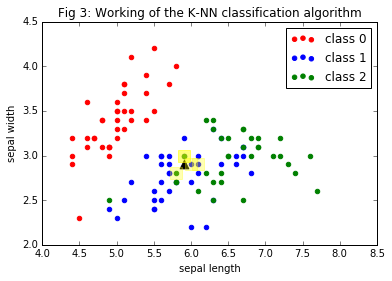

In [8]:
neighbors_object = neighbors.NearestNeighbors(n_neighbors=5)
neighbors_object.fit(x_train)
distances_of_nearest_neighbors, indices_of_nearest_neighbors_of_query_point = neighbors_object.kneighbors([query_point])
nearest_neighbors_of_query_point = x_train[indices_of_nearest_neighbors_of_query_point[0]]
print("The query point is: {}\n".format(query_point))
print("The nearest neighbors of the query point are:\n {}\n".format(nearest_neighbors_of_query_point))
print("The classes of the nearest neighbors are: {}\n".format(y_train[indices_of_nearest_neighbors_of_query_point[0]]))
print("Predicted class for query point: {}".format(predicted_class_for_query_point[0]))

plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='blue')
plt.scatter(X_class2[:,0], X_class2[:,1],color='green')
plt.scatter(query_point[0], query_point[1],marker='^',s=75,color='black')
plt.scatter(nearest_neighbors_of_query_point[:,0], nearest_neighbors_of_query_point[:,1],marker='s',s=150,color='yellow',alpha=0.30)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1','class 2'])
plt.title('Fig 3: Working of the K-NN classification algorithm')
plt.show()